<a href="https://colab.research.google.com/github/ustab/MY-PROJECTS-ON-UNSUPERVISED-MACHINE-LEARNING/blob/main/Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I worked on this 'hands on project' on Unsupervised Machine Learning. My study has been under the guidance of the Instructer, *Ryan is a Stanford Certified Project Manager (SCPM), certified Professional Engineer (P.Eng.) in Ontario, a member of the Society of Automotive Engineers (SAE), and a member of the Institute of Electrical and Electronics Engineers (IEEE). He is also the program Co-Chair at the 2017 IEEE Transportation and Electrification Conference (iTEC’17) in Chicago, IL, USA.*
in this project, I aimed to practice these issues below:

Task 1: Understand the problem statement and business case    

Task 2: Import libraries and datasets    

Task 3: Visualize and explore datasets    

Task 4: Understand the theory and intuition behind k-means clustering machine learning algorithm    

Task 5: Learn how to obtain the optimal number of clusters using the elbow method    

Task 6: Use Scikit-Learn library to find the optimal number of clusters using elbow method   

Task 7: Apply k-means using Scikit-Learn to perform customer segmentation    

Task 8: Apply Principal Component Analysis (PCA) technique to perform dimensionality reduction and data visualization 

Please, can you see my study below and, check the link for verifying my certification on this project.


https://coursera.org/verify/KJCJQ88C4NH2

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [12]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('/content/marketing_data.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [15]:
df.shape

(8950, 18)

In [6]:
uniform_data=df.corr()

In [16]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
# Let's apply info and get additional insights on our dataframe
# 18 features with 8950 points  

MINI CHALLENGE #1: 
 - What is the average, minimum and maximum "BALANCE" amount?


In [17]:
print('Average, min, max=', df['BALANCE'].mean(), df['BALANCE'].min(), df['BALANCE'].max()  )

Average, min, max= 1564.4748276781006 0.0 19043.13856


In [ ]:
# Let's apply describe() and get more statistical insights on our dataframe
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

MINI CHALLENGE #2: 
- Obtain the features (row) of the customer who made the maximim "ONEOFF_PURCHASES"
- Obtain the features of the customer who made the maximum cash advance transaction? how many cash advance transactions did that customer make? how often did he/she pay their bill?

In [18]:
df[df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [19]:
df['CASH_ADVANCE'].max()

47137.21176

In [20]:
df[df['CASH_ADVANCE']==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

In [21]:
df=pd.read_csv('/content/marketing_data.csv')

In [22]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS']).mean()

864.2065423050828

In [24]:
df.isnull().sum().sum()

314

In [25]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [26]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

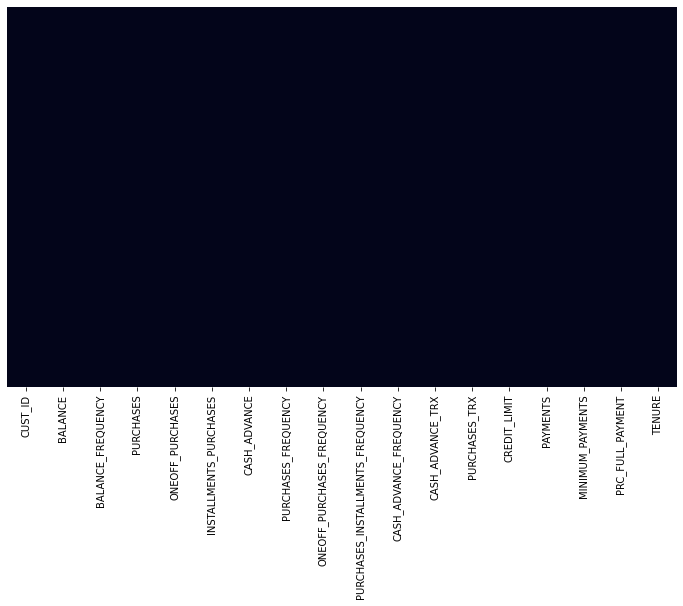

In [27]:
# Let's see if we have any missing data, luckily we don't have many!
plt.figure(figsize=(12,7))
ax = sns.heatmap(df.isnull(), yticklabels = False,  cbar = False)

In [28]:
df = pd.read_csv('/content/marketing_data.csv')

In [29]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
df['MINIMUM_PAYMENTS'].fillna((df['MINIMUM_PAYMENTS'].mean()), inplace=True)#iki yoldan birisi fillna, digeri iloc ile secip, doldurmak asagida

In [31]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()#ikinci yol

In [32]:
df=pd.read_csv('/content/marketing_data.csv')

In [33]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()#ikinci yol


In [34]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()#ikinci yol

In [35]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

MINI CHALLENGE #3: 
 - Fill out missing elements in the "CREDIT_LIMIT" column
 - Double check and make sure that no missing elements are present

In [36]:
df.loc[(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [37]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [38]:
n=len(df.columns)
n

18

In [39]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [38]:
#MINI CHALLENGE #4: 
#Drop Customer ID column 'CUST_ID' and make sure that the column has been removed from the dataframe

In [40]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [41]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [42]:
n = len(df.columns)
n

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

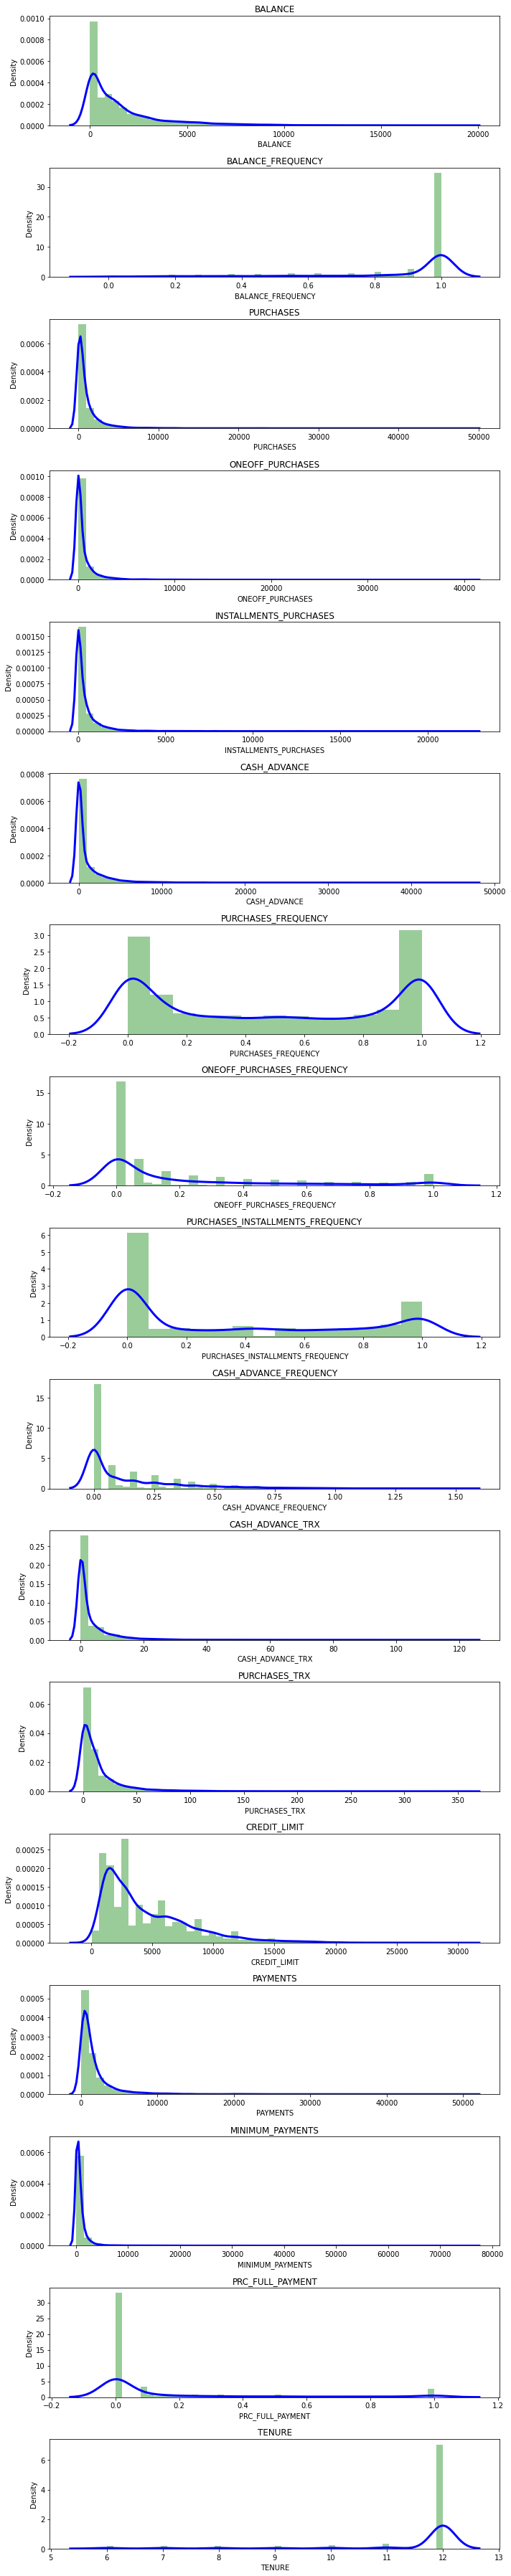

In [43]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout();

MINI CHALLENGE #5: 
- Obtain the correlation matrix between features

In [44]:
df_corr=df.corr()

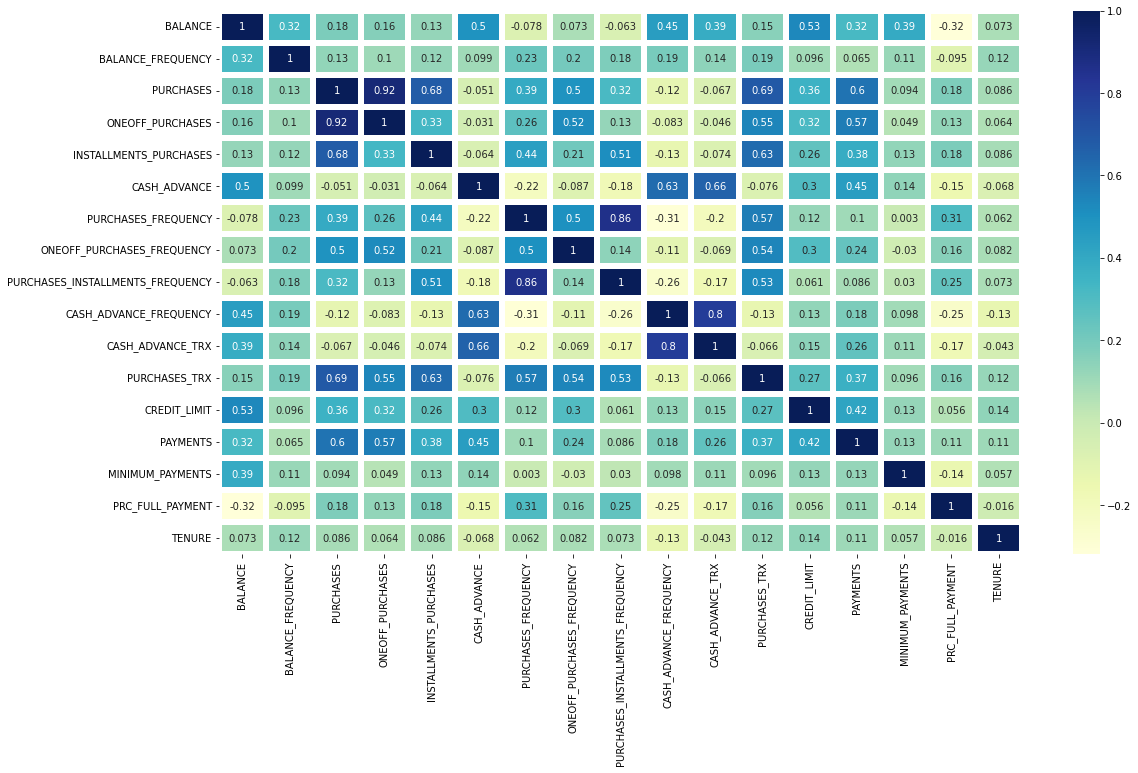

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df_corr, annot=True, linewidth=5, cmap='YlGnBu')

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  
    - K-means terminates when the number of clusters does not increase between iterations
    - K-means terminates when the centroid locations do not change between iterations

   


# TASK #5: LEARN HOW TO OBTAIN THE OPTIMAL NUMBER OF CLUSTERS (ELBOW METHOD)

# TASK #6: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [45]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [46]:
df_scaled.shape

(8950, 17)

In [47]:
df_scaled[:,:7].shape

(8950, 7)

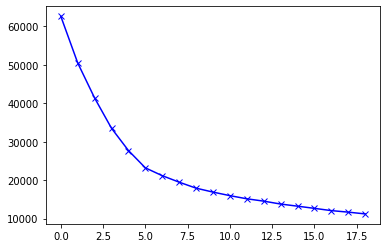

In [48]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')
scores_1=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_scaled[:,:7])
    scores_1.append(kmeans.inertia_) 
plt.plot(scores_1, 'bx-')
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7 or 8.

MINI CHALLENGE #7:
 - Let's assume that our data only consists of the first 7 columns of "creditcard_df_scaled", what is the optimal number of clusters would be in this case? modify the code and rerun the cells. 

# TASK #7: APPLY K-MEANS METHOD

In [49]:
kmeans = KMeans(7)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [50]:
kmeans.cluster_centers_.shape

(7, 17)

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
1,-0.367555,0.330562,-0.039840,-0.234950,0.337266,-0.368099,0.980609,-0.357343,1.173200,-0.477687,-0.362424,0.173897,-0.278236,-0.221810,-0.015735,0.307237,0.252156
2,0.007813,0.402983,-0.343915,-0.225214,-0.399316,-0.104212,-0.810261,-0.336386,-0.752275,0.084852,-0.041723,-0.464616,-0.301035,-0.248908,-0.015791,-0.452844,0.272305
3,1.430238,0.419467,6.915048,6.083034,5.172266,0.038778,1.090699,1.879303,1.049413,-0.249227,-0.038166,4.646228,2.198371,4.783704,1.080945,0.824001,0.334613
4,-0.701872,-2.134325,-0.306924,-0.230292,-0.302515,-0.323078,-0.547138,-0.427951,-0.441452,-0.522249,-0.376815,-0.416568,-0.172739,-0.201746,-0.257554,0.295010,0.200781
5,1.666473,0.392099,-0.205327,-0.149913,-0.210162,1.990753,-0.456789,-0.190269,-0.404044,1.908547,1.922104,-0.241414,1.007587,0.834821,0.552973,-0.391161,0.069807
6,0.126801,0.429730,0.939029,0.895888,0.574411,-0.309125,1.092770,1.872513,0.534806,-0.410394,-0.320751,1.196848,0.701672,0.385048,-0.057462,0.456446,0.307642


In [52]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
1,799.439665,0.955578,918.085545,202.468866,716.053491,206.951098,0.883916,0.095855,0.830697,0.039554,0.775550,19.032274,3482.112568,1091.026929,827.537625,0.243576,11.854768
2,1580.736068,0.972734,268.425678,218.628807,49.971063,760.334088,0.165154,0.102107,0.065464,0.152124,2.964097,3.161211,3399.161094,1012.580763,827.406808,0.021266,11.881732
3,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116
4,103.587241,0.371669,347.456361,210.199629,137.506773,301.361116,0.270757,0.074792,0.188993,0.030637,0.677338,4.355518,3865.955724,1149.108580,263.988609,0.240000,11.786015
5,5033.096672,0.970155,564.520447,343.613277,221.020895,5153.573564,0.307019,0.145697,0.203860,0.517064,16.365772,8.709172,8160.463697,4149.870001,2152.885952,0.039307,11.610738
6,1828.399674,0.979070,3009.455142,2079.427650,930.500678,330.620880,0.928932,0.761065,0.576983,0.053020,1.059937,44.458991,7047.418985,2847.821449,730.293998,0.287217,11.929022


In [53]:
labels.shape # Labels associated to each data point

(8950,)

In [54]:
labels.max()

6

In [55]:
labels.min()

0

In [56]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans


array([0, 1, 2, ..., 4, 4, 4], dtype=int32)

In [57]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


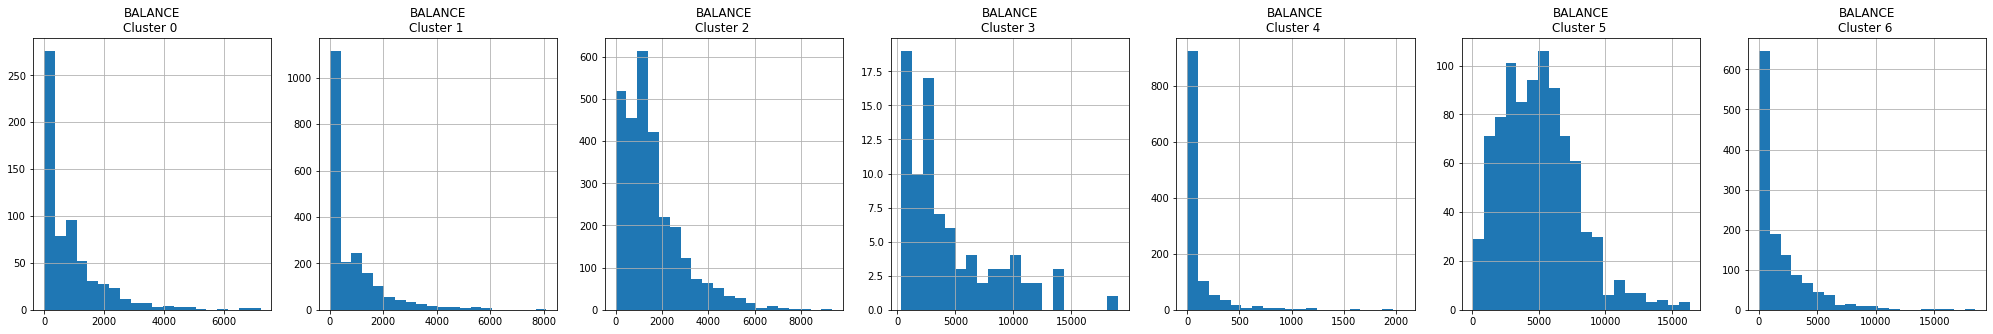

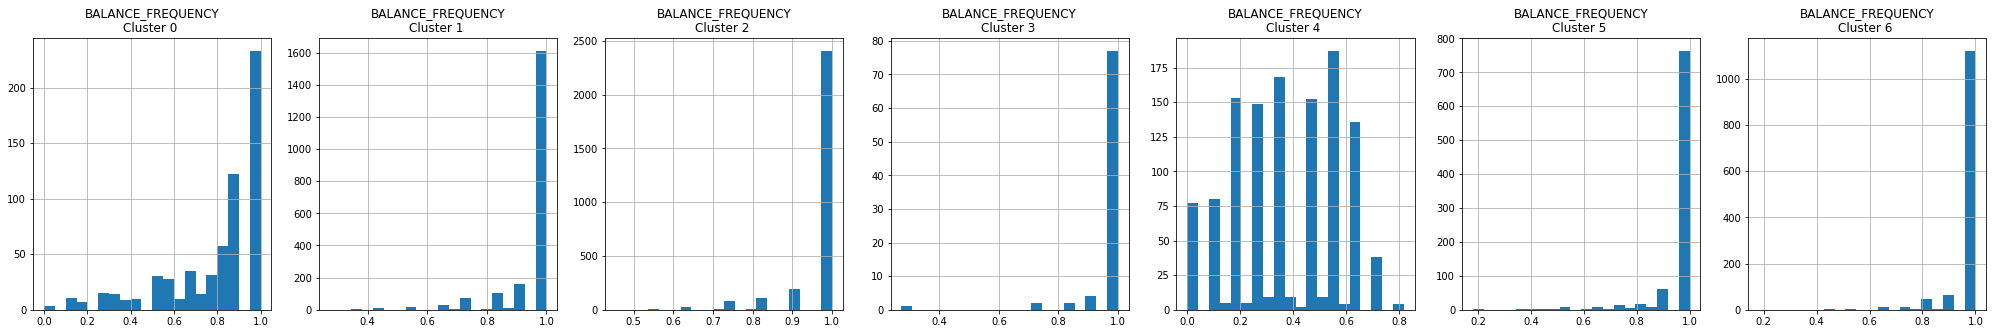

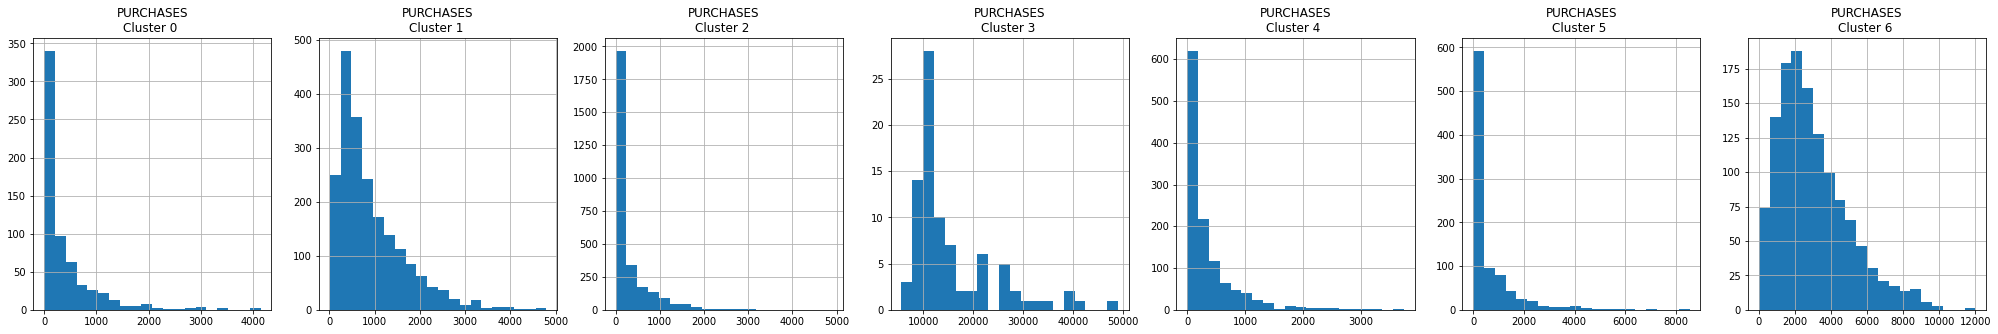

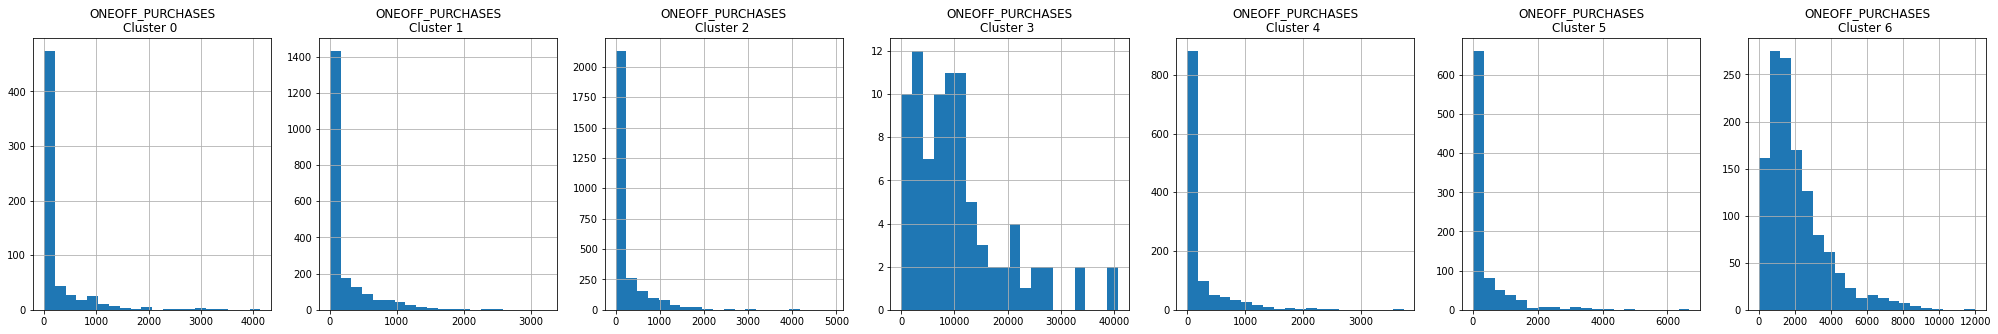

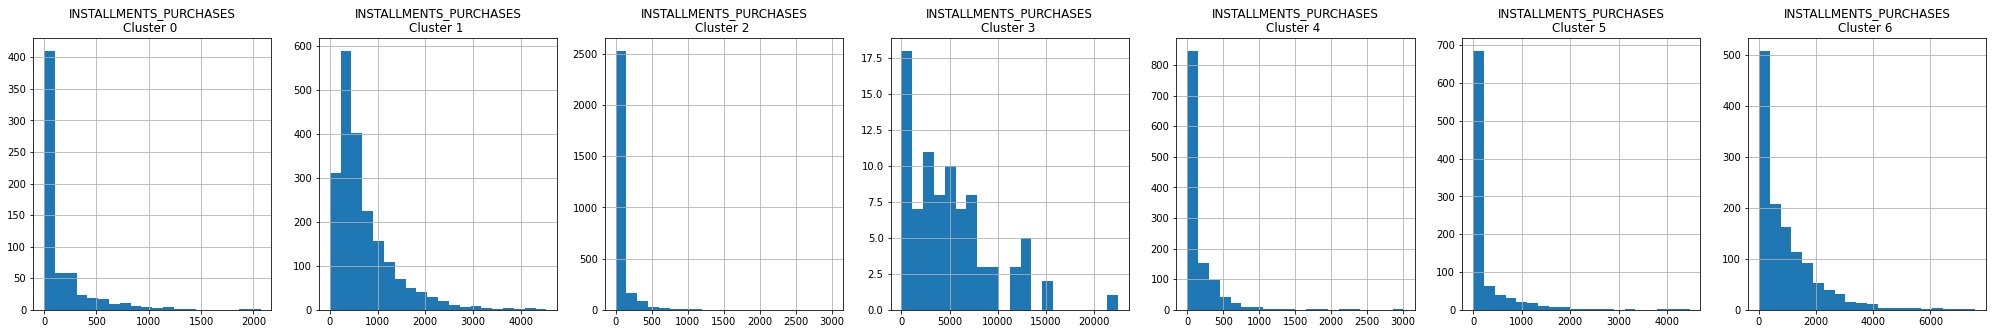

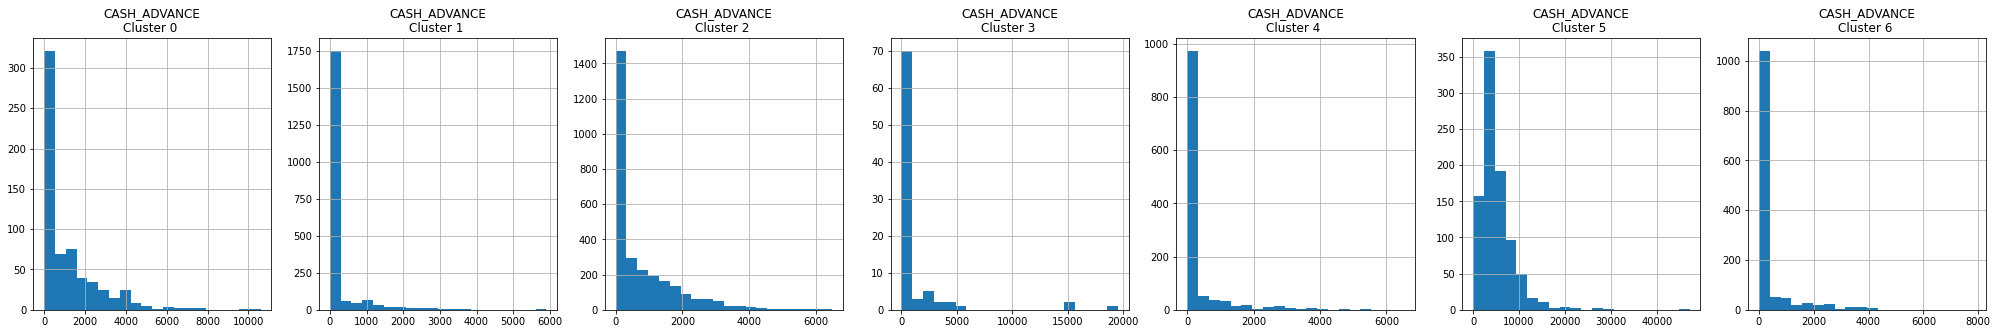

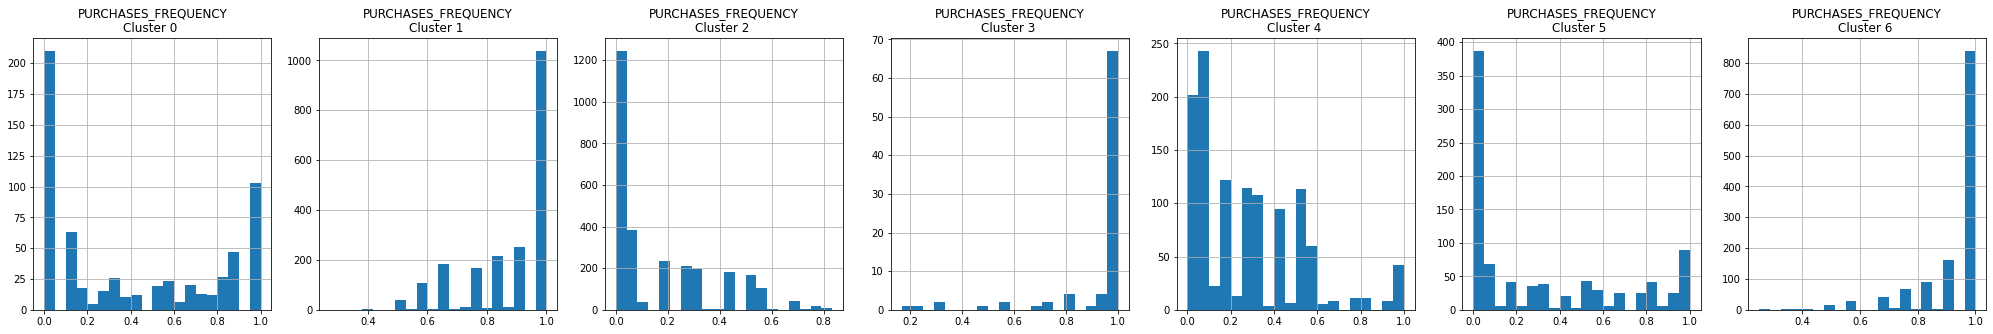

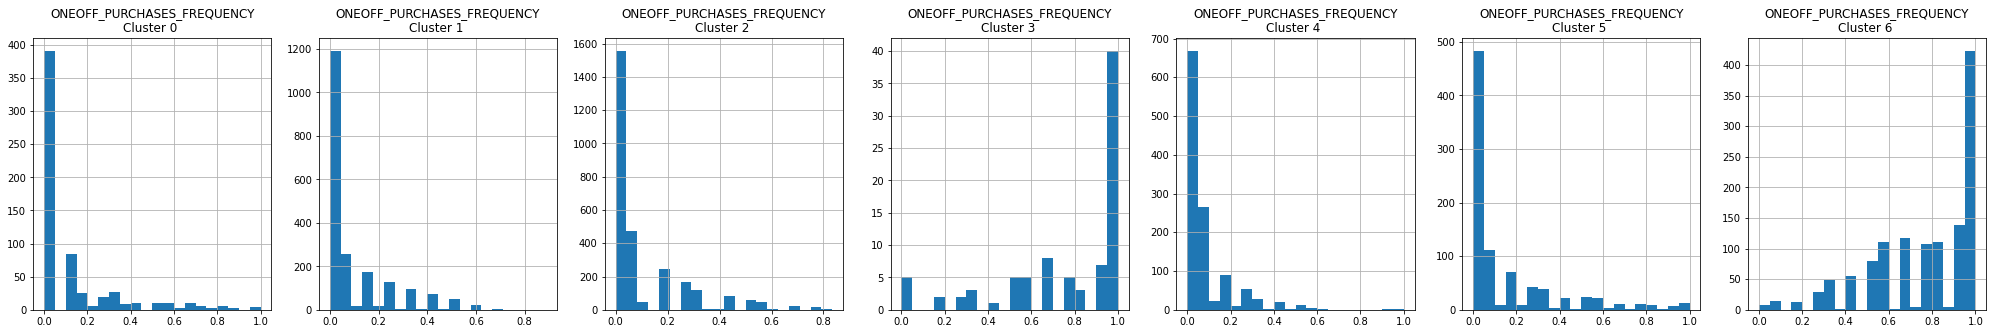

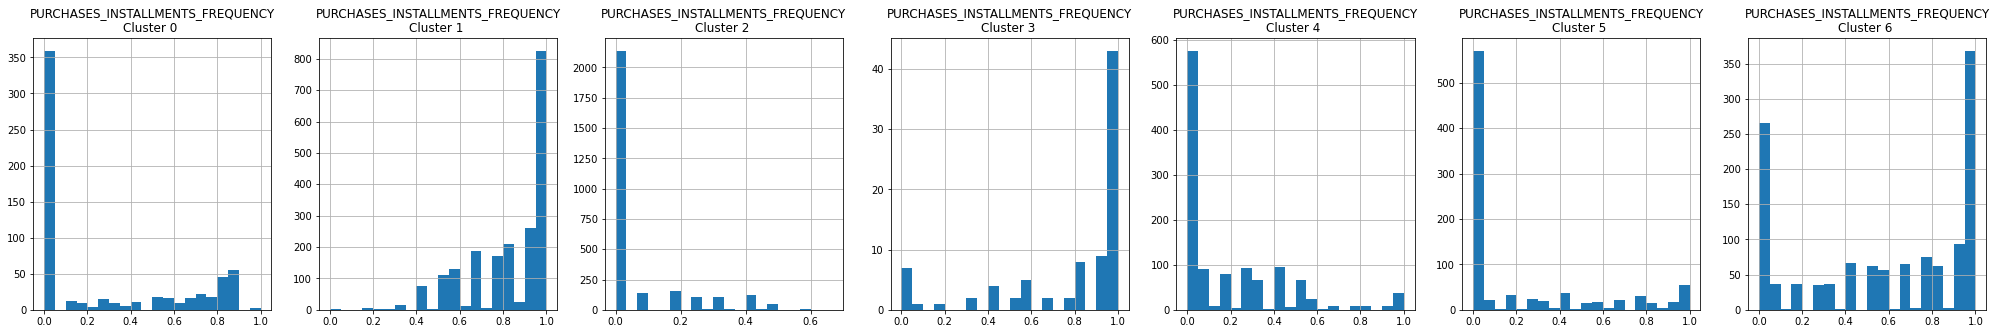

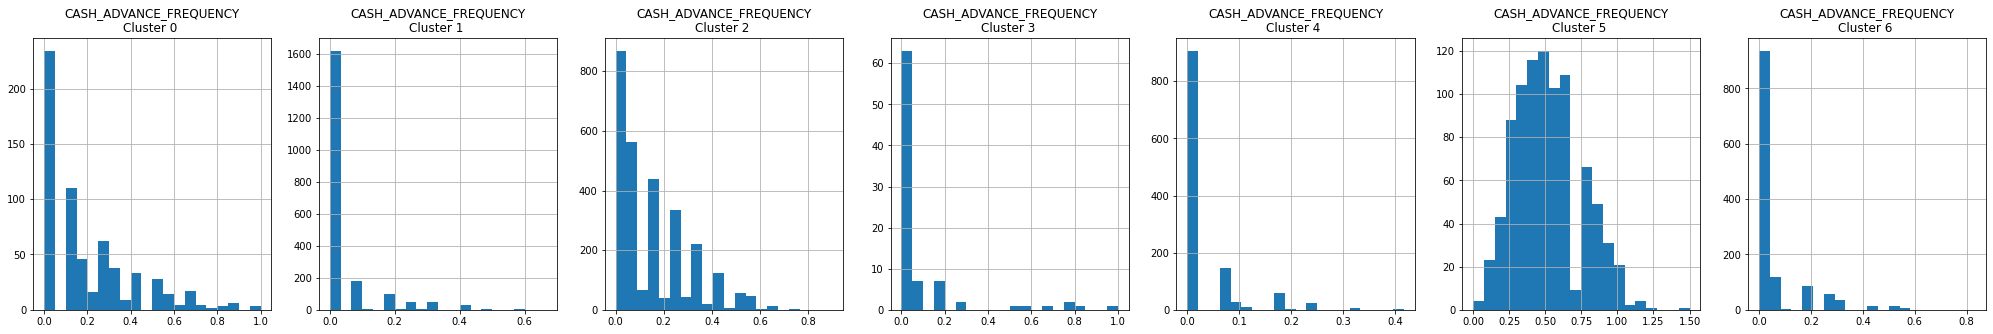

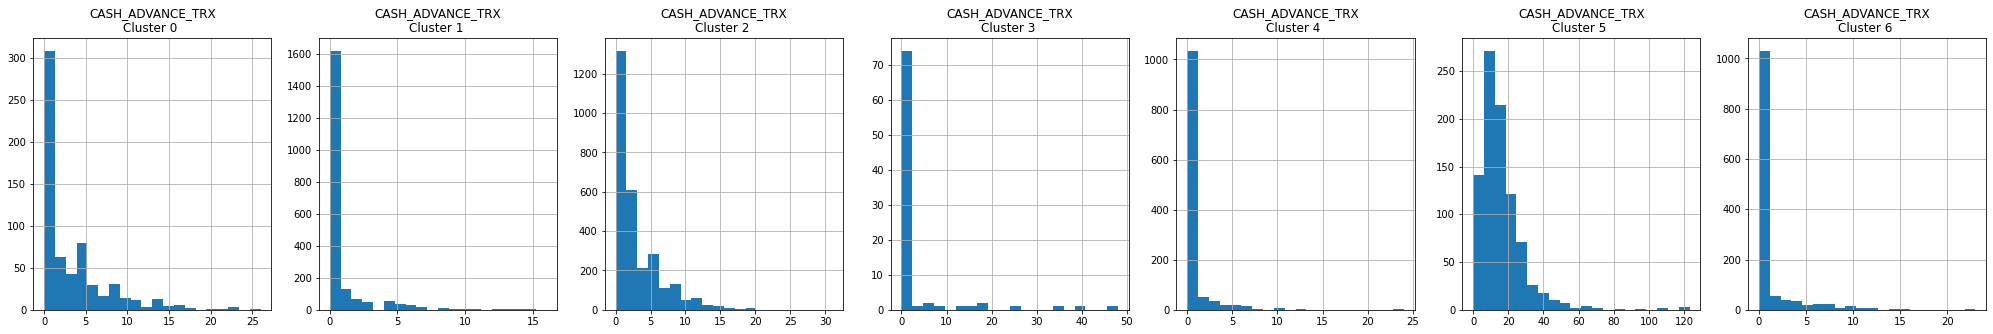

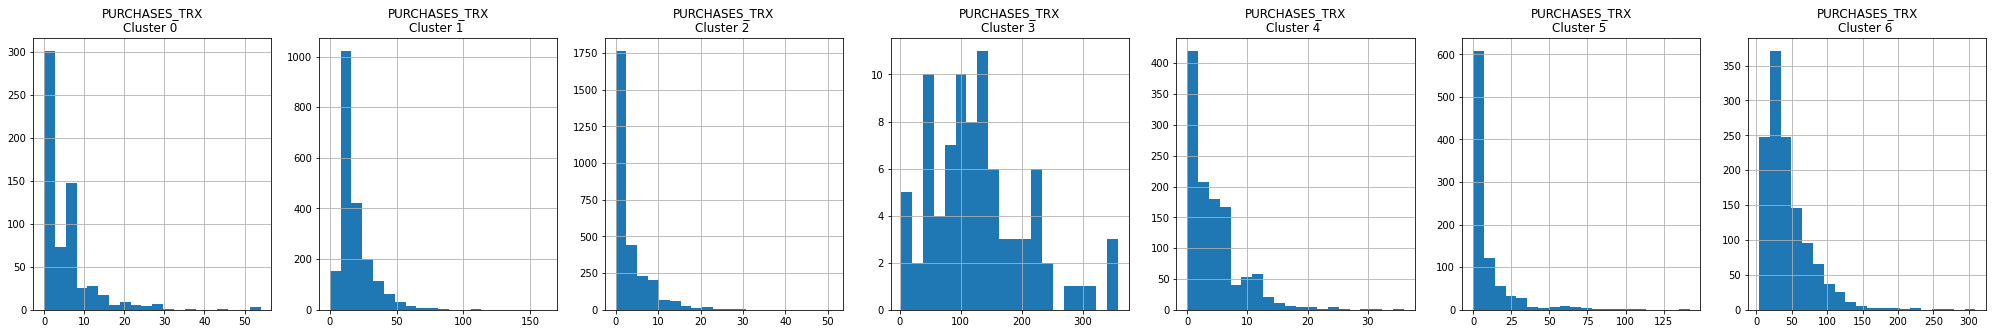

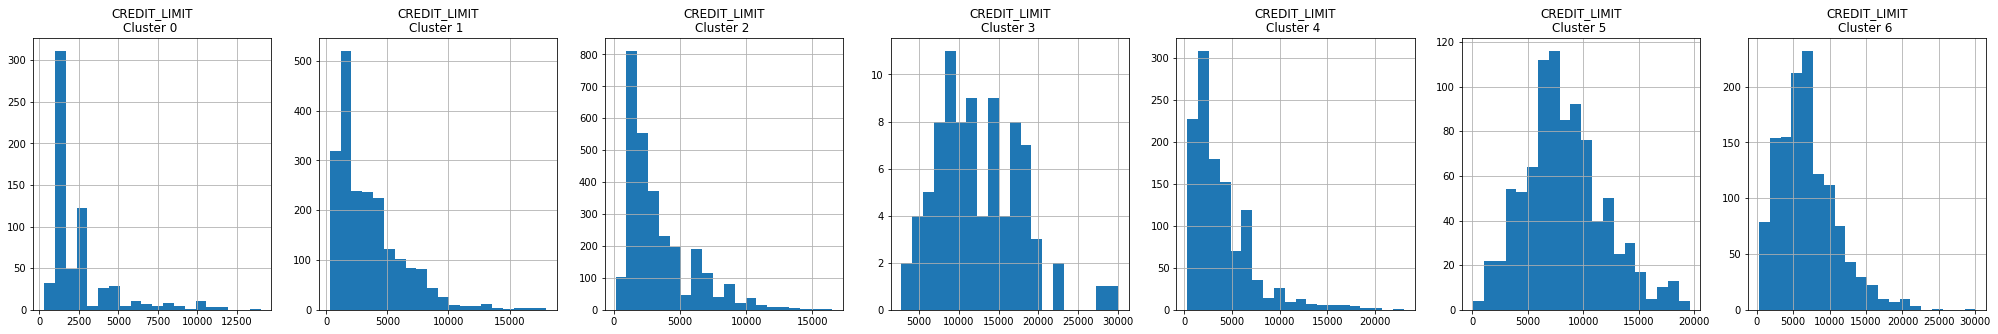

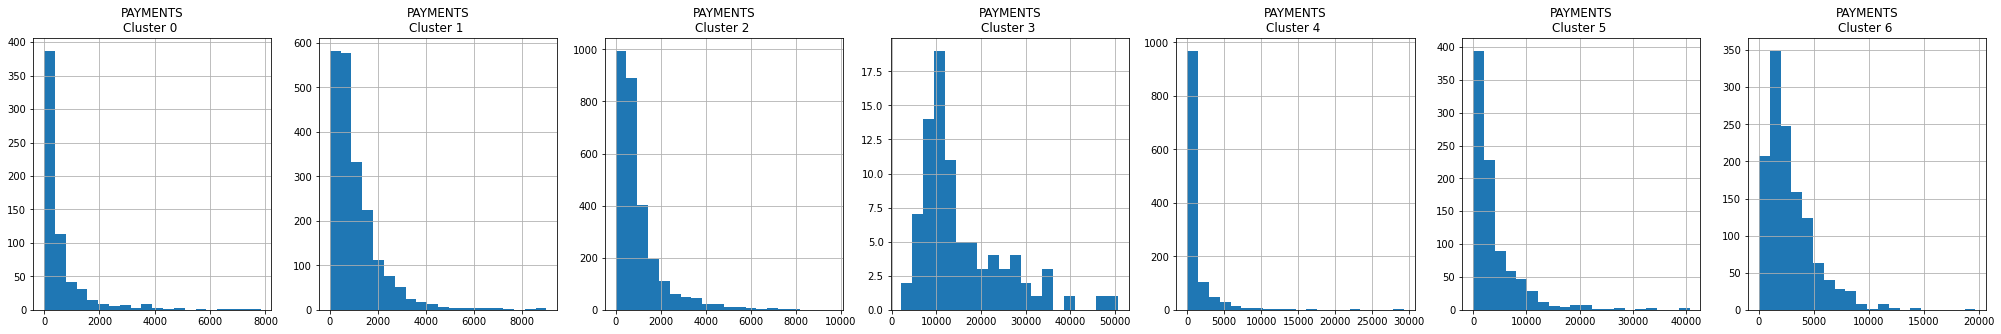

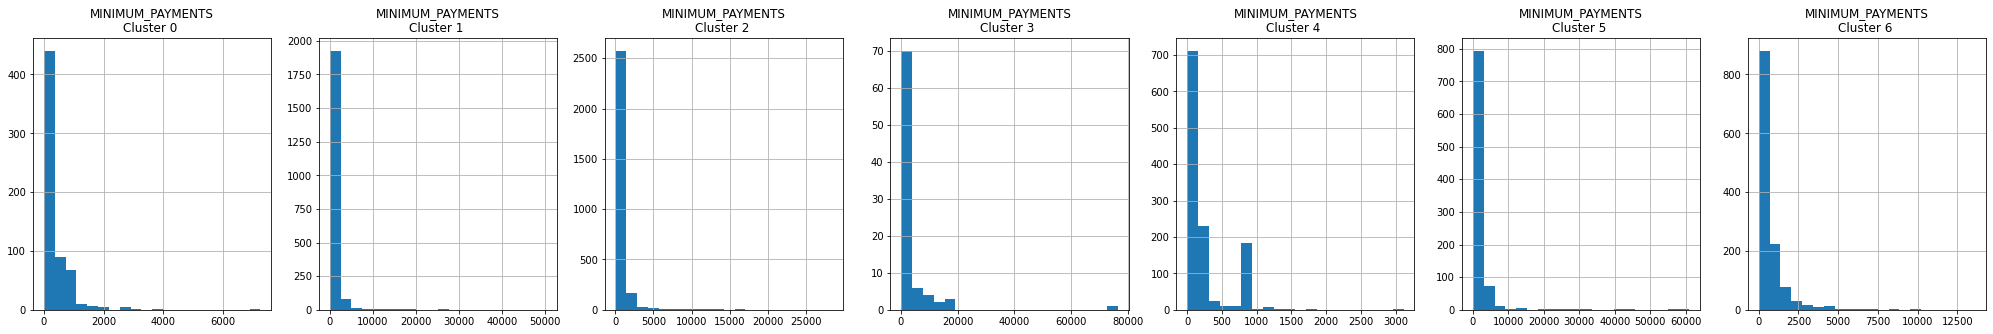

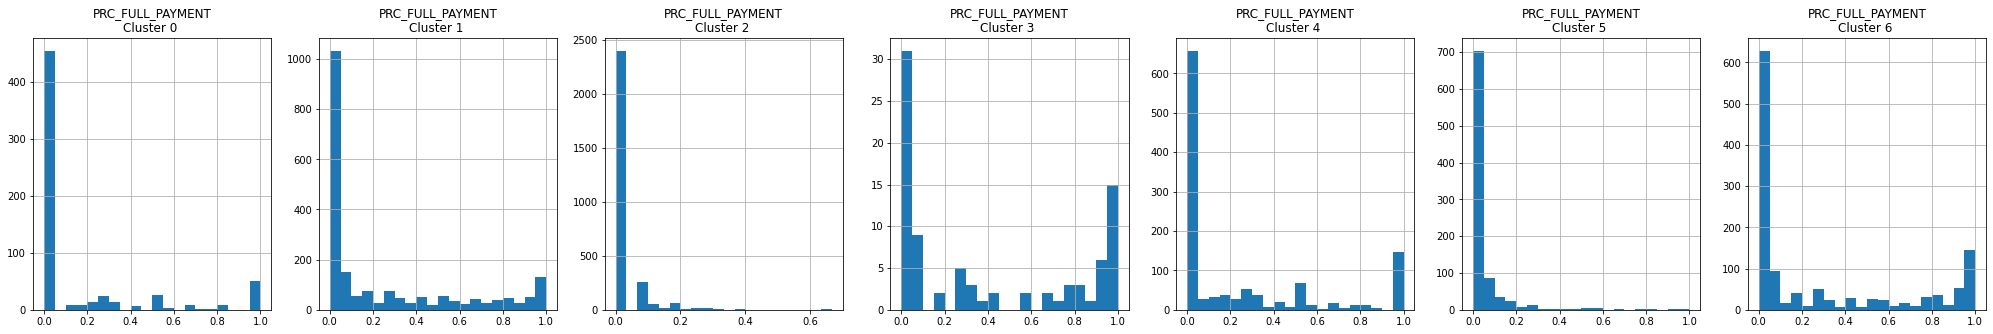

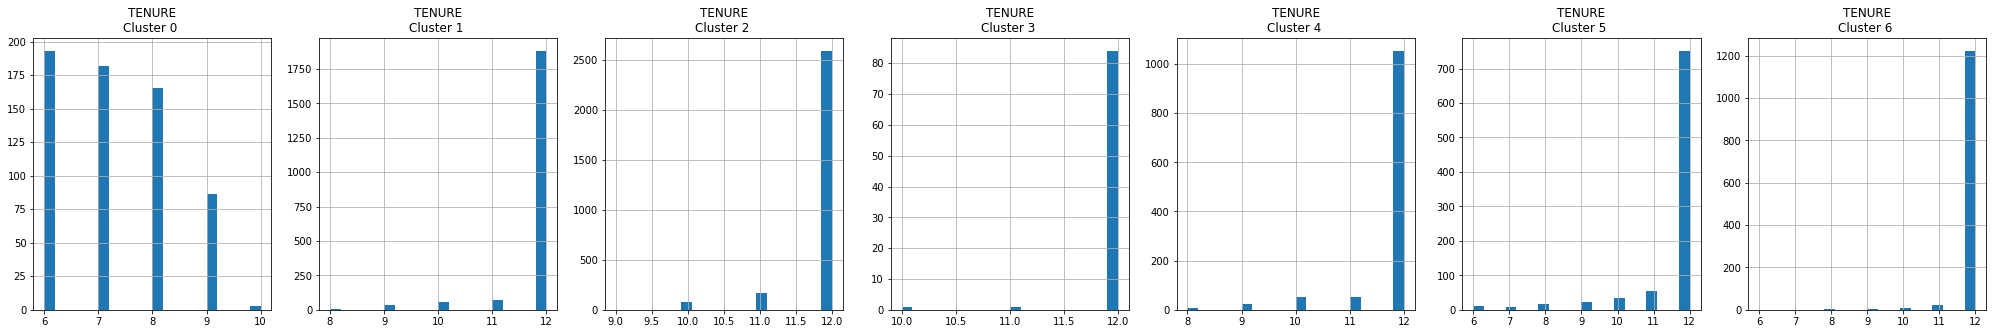

In [58]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}\nCluster {} '.format(i,j))
  
  plt.show()



MINI CHALLENGE #8:
 - Repeat the same procedure with 8 clusters instead of 7


# TASK 8: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [59]:
# Obtain the principal components 
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222101, -1.07645061],
       [-1.13829602,  2.50647813],
       [ 0.9696837 , -0.38352668],
       ...,
       [-0.92620408, -1.81078582],
       [-2.33655136, -0.65796358],
       [-0.55642024, -0.40046672]])

In [60]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076451
1,-1.138296,2.506478
2,0.969684,-0.383527
3,-0.873629,0.043167
4,-1.599434,-0.688581


In [64]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster,cluster
0,-1.682221,-1.076451,2,2
1,-1.138296,2.506478,5,5
2,0.969684,-0.383527,6,6
3,-0.873629,0.043167,2,2
4,-1.599434,-0.688581,2,2


In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

MINI CHALLENGE #9: 
 - Repeat task #7 and #8 with number of clusters = 7 and 4

# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS

MINI CHALLENGE SOLUTIONS

MINI CHALLENGE #1

In [66]:
# Average, minimum and maximum balance amounts
print('The average, minimum and maximum balance amount are:', df['BALANCE'].mean(), df['BALANCE'].min(), df['BALANCE'].max())

The average, minimum and maximum balance amount are: 1564.4748276781006 0.0 19043.13856


MINI CHALLENGE #2

In [67]:
# Let's see who made one off purchase of $40761!
df[df['ONEOFF_PURCHASES'] == 40761.25]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [68]:
df['CASH_ADVANCE'].max()

47137.21176

In [69]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

df[df['CASH_ADVANCE'] == 47137.211760000006]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


MINI CHALLENGE #3

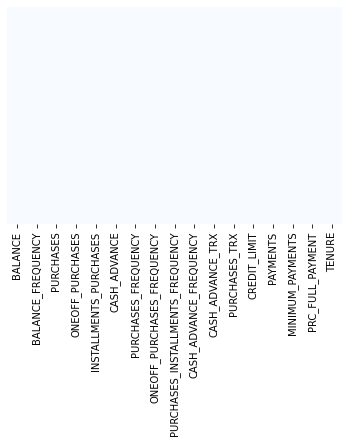

In [71]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

MINI CHALLENGE #4

In [74]:
df = pd.read_csv('/content/marketing_data.csv')

In [76]:
# Let's drop Customer ID since it has no meaning here 
df.drop("CUST_ID", axis = 1, inplace= True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


MINI CHALLENGE #5

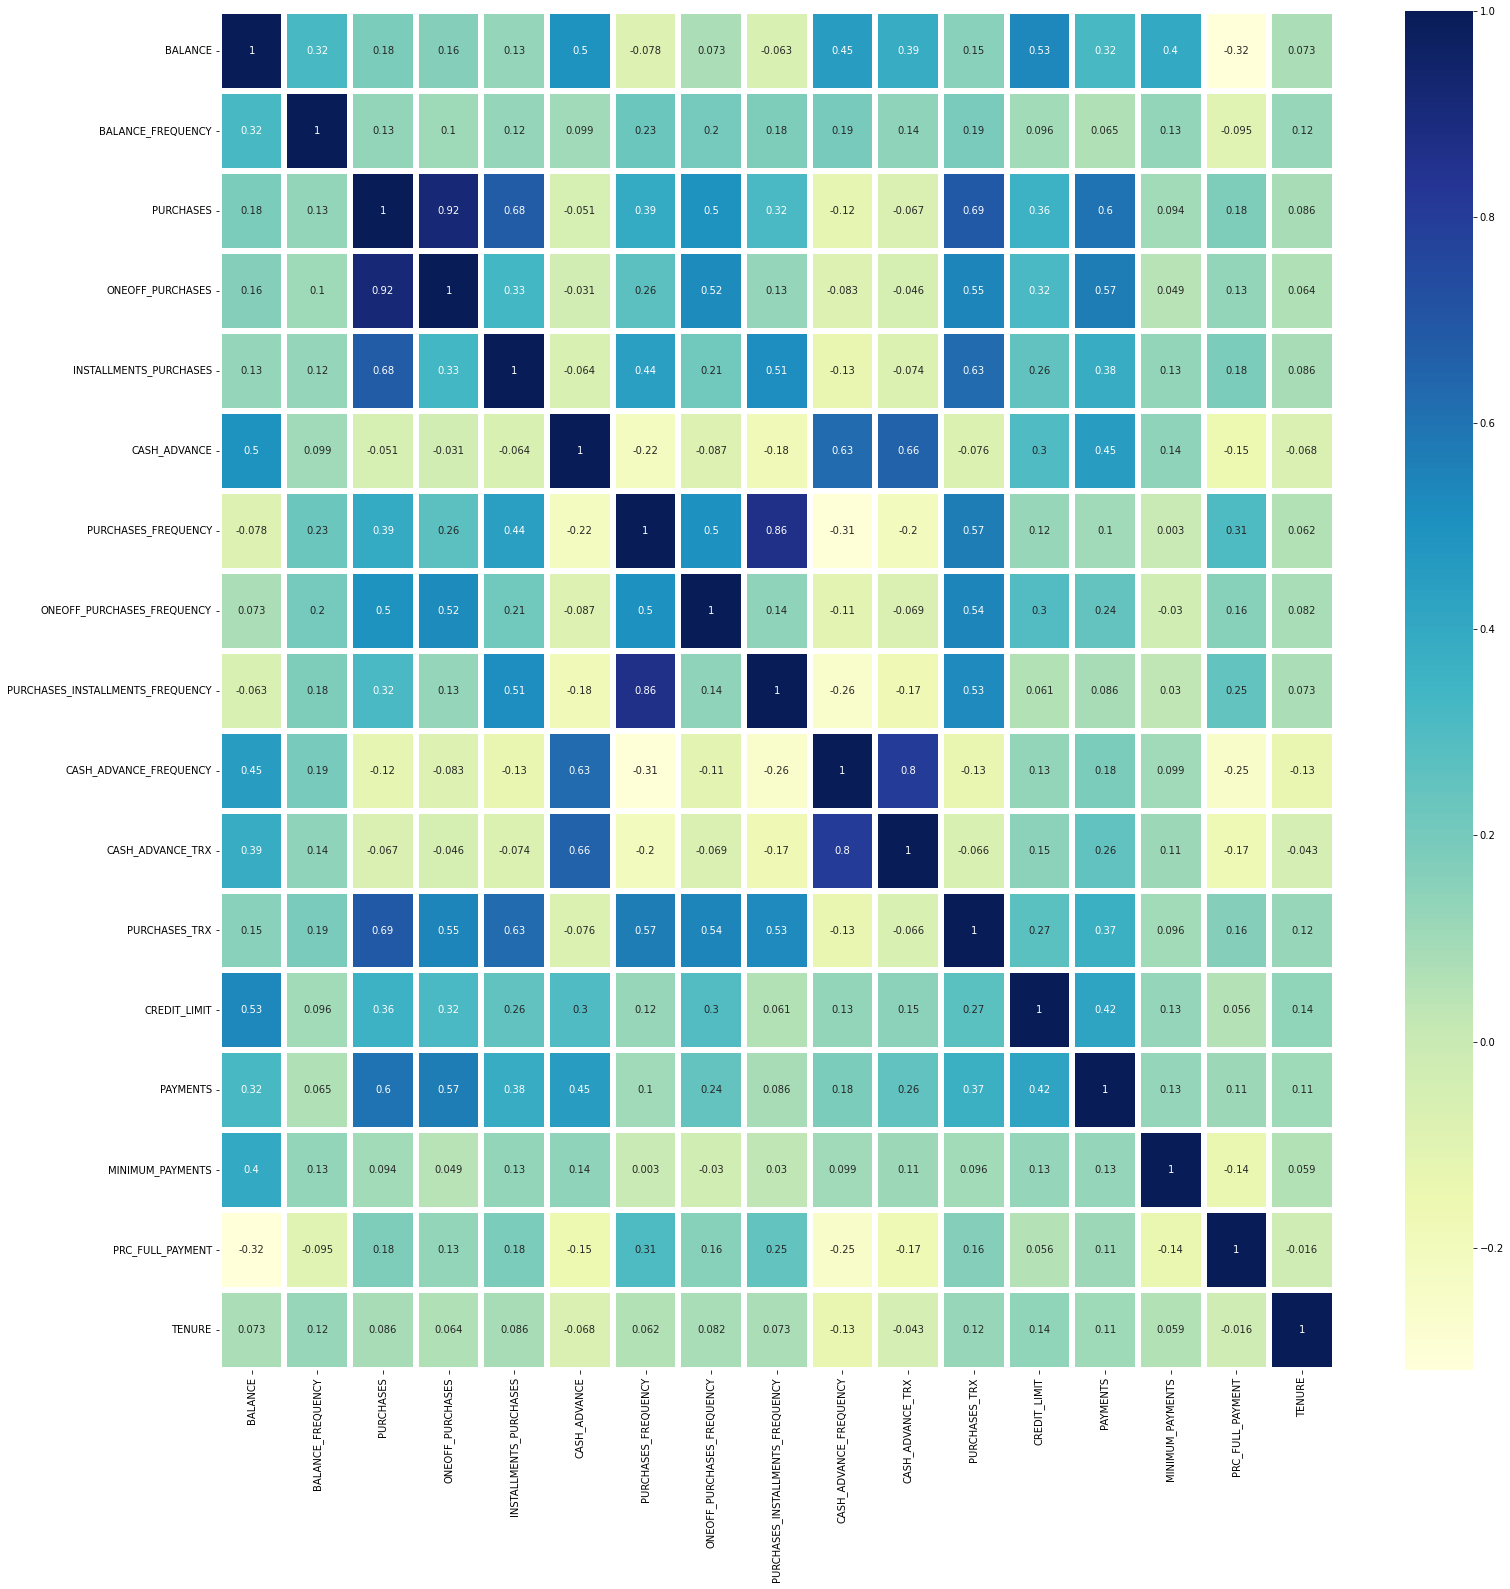

In [80]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (25, 25))
sns.heatmap(correlations, annot = True,linewidth=5, cmap='YlGnBu')

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

MINI CHALLENGE #6: 
- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  (True)
    - K-means terminates when the number of clusters does not increase between iterations (False)
    - K-means terminates when the centroid locations do not change between iterations (True)


MINI CHALLENGE #7: 

In [82]:
# code modification
kmeans.fit(df_scaled[:,:7])
# optimal number of clusters would be = 5

KMeans(n_clusters=7)

MINI CHALLENGE #8 & #9:
 - simply change the values requested in the question and rerun the cells